In [70]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [97]:
# Read data file
df = pd.read_excel('Gold_data_filtered.xlsx', index_col='date')

In [98]:
# Display the first few rows
print(df.head())

# Check for any missing values
print(df.isnull().sum())

# Check the data types of all columns in the DataFrame
print(df.dtypes)


                   open         high          low        close  volume
date                                                                  
2019-03-01  1312.199951  1312.199951  1288.900024  1296.400024     110
2019-03-04  1285.500000  1287.000000  1281.900024  1284.800049      28
2019-03-05  1287.000000  1287.000000  1282.000000  1282.000000     114
2019-03-06  1287.099976  1287.099976  1282.599976  1284.900024      14
2019-03-07  1281.000000  1284.599976  1281.000000  1283.800049      11
open      0
high      0
low       0
close     0
volume    0
dtype: int64
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object


In [99]:
# Drop unused columns
#axis 1 refers column
df.drop(['volume'], axis=1, inplace = True)


In [76]:
df

,open,high,low,close
date,,,,
2019-03-01,1312.199951,1312.199951,1288.900024,1296.400024
2019-03-04,1285.500000,1287.000000,1281.900024,1284.800049
2019-03-05,1287.000000,1287.000000,1282.000000,1282.000000
2019-03-06,1287.099976,1287.099976,1282.599976,1284.900024
2019-03-07,1281.000000,1284.599976,1281.000000,1283.800049
...,...,...,...,...
2024-06-17,2320.199951,2320.199951,2309.600098,2312.399902
2024-06-18,2311.800049,2330.399902,2311.800049,2330.399902
2024-06-20,2328.899902,2354.000000,2328.300049,2353.800049


SPLITTING DATA 7:2:1

In [130]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# Chọn các cột từ 'open' (index 0) đến 'close' (index 3)
x_train = train_data.iloc[:, 0:4]  # Lấy các cột từ index 0 đến 3 (bao gồm 'open', 'high', 'low', 'close')
y_train = train_data.iloc[:, 3]    # Cột 'close' là cột mục tiêu (index 3)

x_test = test_data.iloc[:, 0:4]    # Lấy các cột từ index 0 đến 3
y_test = test_data.iloc[:, 3]      # Cột 'close' là cột mục tiêu

x_val = val_data.iloc[:, 0:4]      # Lấy các cột từ index 0 đến 3
y_val = val_data.iloc[:, 3]        # Cột 'close' là cột mục tiêu


CHOOSE THE VALUE OF K

In [131]:
# Import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [134]:
rmse_val = []  # to store rmse values for different k
for K in range(20):
    K = K + 1
    model = neighbors.KNeighborsRegressor(n_neighbors=K)
    model.fit(x_train, y_train)  # fit the model
    pred = model.predict(x_test)  # make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred))  # calculate rmse
    rmse_val.append(error)  # store rmse values
    print("RMSE value for k= ", K, "is:", error)

RMSE value for k=  1 is: 5.460288801442759
RMSE value for k=  2 is: 4.869465476973586
RMSE value for k=  3 is: 4.981374643682512
RMSE value for k=  4 is: 5.129459104512732
RMSE value for k=  5 is: 5.2213108116061075
RMSE value for k=  6 is: 6.009006843350531
RMSE value for k=  7 is: 6.377330360453543
RMSE value for k=  8 is: 6.894195015752537
RMSE value for k=  9 is: 7.254268179514913
RMSE value for k=  10 is: 7.700338723698475
RMSE value for k=  11 is: 8.321074312647703
RMSE value for k=  12 is: 8.782633779475118
RMSE value for k=  13 is: 9.39439171874683
RMSE value for k=  14 is: 10.066596724454316
RMSE value for k=  15 is: 10.652426382472418
RMSE value for k=  16 is: 11.243114230041932
RMSE value for k=  17 is: 11.786779270171758
RMSE value for k=  18 is: 12.214185451766653
RMSE value for k=  19 is: 12.630398592785776
RMSE value for k=  20 is: 13.066243777453497


<Axes: >

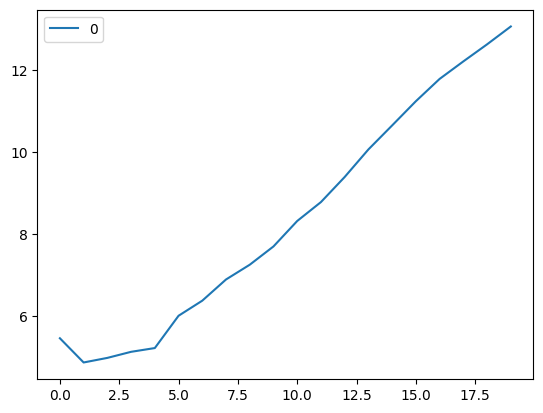

In [135]:
curve = pd.DataFrame(rmse_val) #U-shape
curve.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Define a range of k values to search for
param_grid = {'n_neighbors': range(1, 31)}

# Initialize the KNN regressor without specifying n_neighbors
knn = KNeighborsRegressor()

# Use GridSearchCV to find the best k value
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get the best number of neighbors (k)
best_k = grid_search.best_params_['n_neighbors']
print("Optimal number of neighbors (k):", best_k)




Optimal number of neighbors (k): 1
Best score (negative mean squared error): -1123.61969853725


K-NEAREST NEGIGHBOR

In [137]:
# Create and fit a KNN model

model = KNeighborsRegressor(n_neighbors=best_k)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [138]:
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [139]:
# Create index for the next 30 days based on the last index of the DataFrame
last_index = df.index[-1]
last_data = pd.date_range(start=last_index + pd.Timedelta(days=1), periods=30, freq='D')

# Check the feature names in x_train and create a placeholder DataFrame with the same columns
x_next_30_days = pd.DataFrame(0, index=last_data, columns=x_train.columns)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)


Predicted closing prices for the next 30 days:
[1269.30004883 1269.30004883 1269.30004883 1269.30004883 1269.30004883
 1269.30004883 1269.30004883 1269.30004883 1269.30004883 1269.30004883
 1269.30004883 1269.30004883 1269.30004883 1269.30004883 1269.30004883
 1269.30004883 1269.30004883 1269.30004883 1269.30004883 1269.30004883
 1269.30004883 1269.30004883 1269.30004883 1269.30004883 1269.30004883
 1269.30004883 1269.30004883 1269.30004883 1269.30004883 1269.30004883]


In [140]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
# rmse
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
# mae
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

#mape
test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  5.460288801442759
Testing MAE:  3.8842691142907237
Testing MAPE:  0.19930799159964488
Validation RMSE:  195.90979638873577
Validation MAE:  144.93998752170143
Validation MAPE:  6.267336034455013


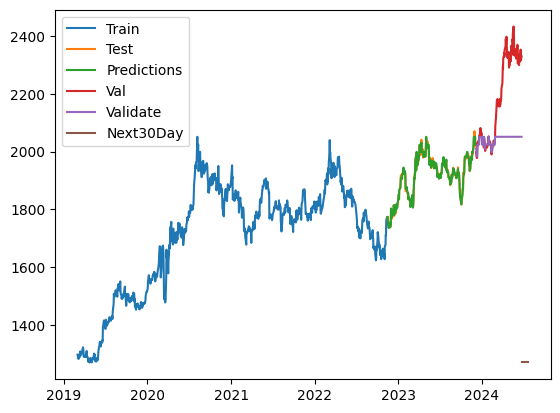

In [141]:
# Plot the model
plt.plot(train_data.index,train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, val_data['close'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Val','Validate','Next30Day'])
plt.show()

In [142]:
# Print accuracy score for the prediction
print('Accuracy: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy: 0.99


SPLITIING DATA 6:3:1

In [120]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# Chọn các cột từ 'open' (index 0) đến 'close' (index 3)
x_train = train_data.iloc[:, 0:4]  # Lấy các cột từ index 0 đến 3 (bao gồm 'open', 'high', 'low', 'close')
y_train = train_data.iloc[:, 3]    # Cột 'close' là cột mục tiêu (index 3)

x_test = test_data.iloc[:, 0:4]    # Lấy các cột từ index 0 đến 3
y_test = test_data.iloc[:, 3]      # Cột 'close' là cột mục tiêu

x_val = val_data.iloc[:, 0:4]      # Lấy các cột từ index 0 đến 3
y_val = val_data.iloc[:, 3]        # Cột 'close' là cột mục tiêu

CHOOSE THE VALUE OF K

In [121]:
rmse_val = []  # to store rmse values for different k
for K in range(20):
    K = K + 1
    model = neighbors.KNeighborsRegressor(n_neighbors=K)
    model.fit(x_train, y_train)  # fit the model
    pred = model.predict(x_test)  # make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred))  # calculate rmse
    rmse_val.append(error)  # store rmse values
    print("RMSE value for k= ", K, "is:", error)

RMSE value for k=  1 is: 5.2186704571782645
RMSE value for k=  2 is: 4.636797408287743
RMSE value for k=  3 is: 4.677211644322689
RMSE value for k=  4 is: 4.87701184070932
RMSE value for k=  5 is: 5.08743849491081
RMSE value for k=  6 is: 5.6073830001341705
RMSE value for k=  7 is: 5.933353228496907
RMSE value for k=  8 is: 6.310453522595661
RMSE value for k=  9 is: 6.62812222152931
RMSE value for k=  10 is: 6.989158219837449
RMSE value for k=  11 is: 7.520295359923844
RMSE value for k=  12 is: 7.9168779409914185
RMSE value for k=  13 is: 8.37622108333051
RMSE value for k=  14 is: 8.860948819381012
RMSE value for k=  15 is: 9.305191224692523
RMSE value for k=  16 is: 9.781792871397766
RMSE value for k=  17 is: 10.215151876127752
RMSE value for k=  18 is: 10.555850752417312
RMSE value for k=  19 is: 10.882366769983157
RMSE value for k=  20 is: 11.20725391328263


<Axes: >

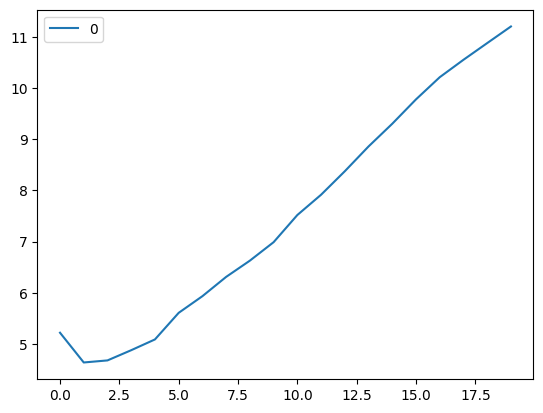

In [122]:
curve = pd.DataFrame(rmse_val) #U-shape
curve.plot()

In [123]:


# Define a range of k values to search for
param_grid = {'n_neighbors': range(1, 31)}

# Initialize the KNN regressor without specifying n_neighbors
knn = KNeighborsRegressor()

# Use GridSearchCV to find the best k value
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get the best number of neighbors (k)
best_k = grid_search.best_params_['n_neighbors']
print("Optimal number of neighbors (k):", best_k)


Optimal number of neighbors (k): 1


K-NEAREST NEIGHBOR

In [124]:
# create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = best_k)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [125]:
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [126]:
# Create index for the next 30 days based on the last index of the DataFrame
last_index = df.index[-1]
last_data = pd.date_range(start=last_index + pd.Timedelta(days=1), periods=30, freq='D')

# Check the feature names in x_train and create a placeholder DataFrame with the same columns
x_next_30_days = pd.DataFrame(0, index=last_data, columns=x_train.columns)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)


Predicted closing prices for the next 30 days:
[1269.30004883 1269.30004883 1269.30004883 1269.30004883 1269.30004883
 1269.30004883 1269.30004883 1269.30004883 1269.30004883 1269.30004883
 1269.30004883 1269.30004883 1269.30004883 1269.30004883 1269.30004883
 1269.30004883 1269.30004883 1269.30004883 1269.30004883 1269.30004883
 1269.30004883 1269.30004883 1269.30004883 1269.30004883 1269.30004883
 1269.30004883 1269.30004883 1269.30004883 1269.30004883 1269.30004883]


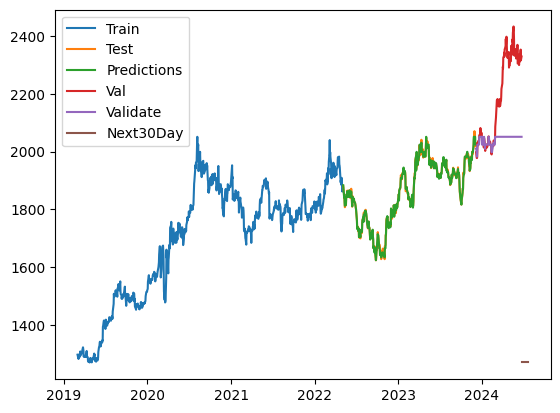

In [127]:
# Plot the model
plt.plot(train_data.index,train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, val_data['close'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Val','Validate','Next30Day'])
plt.show()

In [128]:
# Print accuracy score for the prediction
print('Accuracy: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy: 1.00


In [129]:
print("x_train columns:", x_train.columns)
print("x_test columns:", x_test.columns)
print("x_val columns:", x_val.columns)
print("x_next_30_days columns:", x_next_30_days.columns)


x_train columns: Index(['open', 'high', 'low', 'close'], dtype='object')
x_test columns: Index(['open', 'high', 'low', 'close'], dtype='object')
x_val columns: Index(['open', 'high', 'low', 'close'], dtype='object')
x_next_30_days columns: Index(['open', 'high', 'low', 'close'], dtype='object')
